In [1]:

import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


<h1> Coursera Capstone - REPORT </h1>


<h2>Battle of Neighbourhoods </h2>


<b>1. Introduction Section : </b>

Discussion of the business problem and the audience who would be interested in this project.

<b>1.1 Scenario and Background</b>

I am a IT Consultang currently residing in Downtown Toronto. I currently live within walking distance to Downtown "Dundasa Subway station" therefore I have access to good public transportation to work. Likewise, I enjoy many ammenities in the neighborhood , such as international cuisine restaurants, cafes, food shops and entertainment. 

I have been offered a great opportunity to work in Manhattan, NY. Eventhough I am looking forward to it, I am a bit nervous about the fact that i need to secure a comparable place to live in Manhattan. 

Therefore, I decided to apply the learned skills during the Coursera course to explore ways to make sure my decision is factual and rewarding. 

Of course, there are alternatives to achieve the answer using available Google and forums, but it rewarding doing it myself with learned tools.

<b>1.2 Problem to be resolved:</b>

The challenge to resolve is being able to find a rental apartment unit in Manhattan NY that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a rent a unit subject to the following conditions:

Apartment with min 2 bedrooms with monthly rent not to exceed US$5000/month

Unit located within walking distance from a subway metro station in Manhattan

Area with ammenities and venues similar to the ones described for current location 

<b>1.3 Interested Audience</b>

I believe this is a relevant project for a person or entity considering moving to a major city in anywhere, since the approach and methodologies used here are applicable in all cases. T



<b> 2. Data Section: </b>

Description of the data and its sources that will be used to solve the problem

<b> 2.1 Data of Current Situation </b>

I Currently reside in the neighborhood of 'Bay Street' in Downtown Toronto. I use Foursquare to identify the venues around the area of residence which are then shown in the Singapore map shown in methodology and execution in section 3.0 . It serves as a reference for comparison with the desired future location in Manhattan NY

<b> 2.2 Data Required to resolve the problem</b>

In order to make a good choice of a similar apartment in Manhattan NY, the following data is required: List/Information on neighborhoods form Manhattan with their Geodata ( latitud and longitud. List/Information about the subway metro stations in Manhattan with geodata. Listed apartments for rent in Manhattan area with descriptions ( how many beds, price, location, address) Venues and ammenities in the Manhattan neighborhoods (e.g. top 10) 

<b> 2.3 sources and manipulation The list of Manhattan neighborhoods is worked out during LAb exercise during the course. A csv file was created which will be read in order to create a dataframe and its mapping.  </b>

The csv file 'Manhattan_borough.csv' has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings.



Borough	   Neighborhood 	Latitude	 Longitude
Manhattan	Marble Hill	40.87655078	-73.91065966
Manhattan	Chinatown	40.71561842	-73.99427936
Manhattan	Washington Heights	40.85190253	-73.93690028
Manhattan	Inwood	40.86768396	-73.92121042
Manhattan	Hamilton Heights	40.82360428	-73.94968792
Manhattan	Manhattanville	40.81693443	-73.95738539

A list of Manhattan subway metro stops was complied in Numbers (Apple excel) and it was complemeted with wikipedia data ( https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Manhattan) and information from NY Transit authority and Google maps (https://www.google.com/maps/search/manhattan+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1) for a final consolidated list of subway stops names and their address. The geolocation was obtained via an algorythm using Nominatim. Details will be shown in the execution of methodolody in section 3.0.


A list of places for rent was collected by web-browsing real estate companies in Manhattan : http://www.rentmanhattan.com/index.cfm?page=search&state=results https://www.nestpick.com/search?city=new-york&page=1&order=relevance&district=manhattan&gclid=CjwKCAiAjNjgBRAgEiwAGLlf2hkP3A-cPxjZYkURqQEswQK2jKQEpv_MvKcrIhRWRzNkc_r-fGi0lxoCA7cQAvD_BwE&type=apartment&display=list https://www.realtor.com/apartments/Manhattan_NY A csv file was compiled with the rental place that indicated: areas of Manhattan, address, number of beds, area and monthly rental price. The csv file "nnnn.csv" had the following below structure. An algorythm was used to create all the geodata using Nominatim, as shown in section 3.0. The actual algorythm coding may be shown in 'markdown' mode becasues it takes time to run. With the use of geolocator = Nominatim() , it was possible to determine the latitude and longiude for the subway metro locations as well as for the geodata for each rental place listed. The loop algorythms used are shown in the execution of data in section 3.0 "Great_circle" function from geolocator was used to calculate distances between two points , as in the case to calculate average rent price for units around each subway station and at 1.6 km radius. Foursquare is used to find the avenues at Manhattan neighborhoods in general and a cluster is created to later be able to search for the venues depending of the location shown.

<b> 2.4 How the data will be used to solve the problem </b>

The data will be used as follows: Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB) Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. create a map that depicts, for instance, the average rental price per square ft, around a radius (1/1.5 miles) around each subway station - or a similar metric. 

I will be able to quickly point to the popups to know the relative price per subway area. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim. Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.

<b>2.5 Mapping of Data</b>

The following maps were created to facilitate the analysis and the choice of the palace to live. Manhattan map of Neighborhoods manhattan subway metro locations Manhattan map of places for rent Manhattan map of clustered venues and neighborhoods Combined maps of Manhattan rent places with subway locations Combined maps of Manhattan rent places with subway locations and venues clusters

<b> 3. Methodology section: </b>

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

The analysis and the startegy:

The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent.

The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Toronto. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:

what is the cost of available rental places that meet the demands?
what is the cost of rent around a mile radius from each subway metro station?
what is the area of Manhattan with best rental pricing that meets criteria established?



<H2>Toronto Downtown Map - Current residence and venues in neighborhood

<h3> To compare with Newyork renting place

In [2]:
# 570 bay street toronto on m5g 0b2 canada
address = '570 Bay Street, Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Toronto home are 43.6551177, -79.383814.


In [3]:
neighborhood_latitude= 43.6551177
neighborhood_longitude= -79.383814

<h2> Foursquare - To find venues around current stay

In [4]:
CLIENT_ID = "PDX1CMTTXZN5R2AICP1JD25OOFFPSKVDAAJ1HAPU1U1T4E1Y" # your Foursquare ID
CLIENT_SECRET = "N3KCXJ0LBFI0MPFH5DHPX2CPVVYAGHB1OBSKIKYFL0GISSGF" # your Foursquare Secret
VERSION = "20180405" #PI version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PDX1CMTTXZN5R2AICP1JD25OOFFPSKVDAAJ1HAPU1U1T4E1Y
CLIENT_SECRET:N3KCXJ0LBFI0MPFH5DHPX2CPVVYAGHB1OBSKIKYFL0GISSGF


In [5]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=PDX1CMTTXZN5R2AICP1JD25OOFFPSKVDAAJ1HAPU1U1T4E1Y&client_secret=N3KCXJ0LBFI0MPFH5DHPX2CPVVYAGHB1OBSKIKYFL0GISSGF&v=20180405&ll=43.6551177,-79.383814&radius=500&limit=100'

In [6]:
# results display is hidden for report simplification 
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cdbcd0a9fb6b775955f3dfd'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5227bb01498e17bf485e6202-0',
      'venue': {'beenHere': {'count': 0,
        'lastCheckinExpiredAt': 0,
        'marked': False,
        'unconfirmedCount': 0},
       'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
          'suffix': '.png'},
         'id': '4f2a25ac4b909258e854f55f',
         'name': 'Neighborhood',
         'pluralName': 'Neighborhoods',
         'primary': True,
         'shortName': 'Neighborhood'}],
       'contact': {},
       'hereNow': {'count': 0, 'groups': [], 'summary': 'Nobody here'},
       'id': '5227bb01498e17bf485e6202',
       'location': {'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
      

Category of Venues

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
venues = results['response']['groups'][0]['items']
TOnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
TOnearby_venues =TOnearby_venues.loc[:, filtered_columns]
# filter the category for each row
TOnearby_venues['venue.categories'] = TOnearby_venues.apply(get_category_type, axis=1)
# clean columns
TOnearby_venues.columns = [col.split(".")[-1] for col in TOnearby_venues.columns]

TOnearby_venues.shape

(100, 4)

In [9]:
#venues nearby

TOnearby_venues.head(10)

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
2,Textile Museum of Canada,Art Museum,43.654396,-79.386500
3,Japango,Sushi Restaurant,43.655268,-79.385165
4,Tsujiri,Tea Room,43.655374,-79.385354
5,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
6,Sansotei Ramen 三草亭,Ramen Restaurant,43.655157,-79.386501
7,The Queen and Beaver Public House,Gastropub,43.657472,-79.383524
8,MUJI,Miscellaneous Shop,43.656024,-79.383284
9,Red Lobster,Seafood Restaurant,43.656328,-79.383621


<h3> Map of Toronto residence

In [10]:
latitude=43.6551177
longitude=-79.383814
# create map of Toronto downtwon place  using latitude and longitude values
map_to = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(TOnearby_venues['lat'], TOnearby_venues['lng'], TOnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='green',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_to)  
    
map_to

<H2> Manhattan Neighborhood

In [11]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_35c89f499efc4563864bcff31bc52acf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='lMhEkAcy1xJs7RSwOMzb4o_XQ7sGF87EnFuo61M8qmLG',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='Manhattan_Borough.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

df_data_1.tail()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
35,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,Manhattan,Tudor City,40.746917,-73.971219,3
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,Manhattan,Flatiron,40.739673,-73.990947,3
39,Manhattan,Hudson Yards,40.756658,-74.000111,2


In [12]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='Manhattan_Borough_Cluster.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


<h2>
Map of Manhattan neighborhoods with top 10 clustered venues

In [13]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude1= 40.7308619
longitude1= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Neighborhood'], df_data_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

<H2> Print Venues

Assign a value to 'kk' to explore a given cluster.

In [14]:
kk = 2
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


<h2> Places to rent in Manhattan

 Manhattan real estate webs were webscrapped to collect rental data and it was summarized in a csv file for direct reading

In [15]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='rent.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_rent = pd.read_csv(body)
mh_rent.head()



,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,NaN,NaN


The latitude and longitude data was stored in a csv file for direct upload. since these were already done as a part of prior lab exercise. DOne for simplification reasons

In [16]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='lat.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


mh_rent = pd.read_csv(body)

mh_rent.head()



,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


Manhattan Rent

In [17]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='rent-lat.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mh_rent = pd.read_csv(body)
mh_rent.head()



,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,40.744118,-73.995299


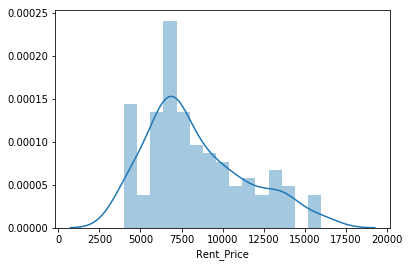

In [18]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

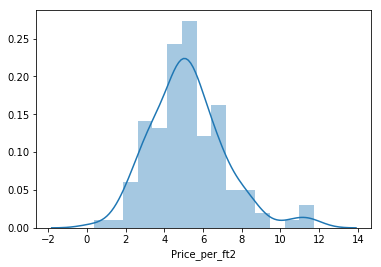

In [19]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


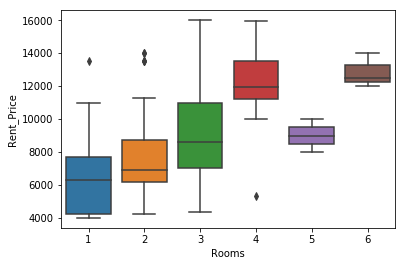

In [20]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

Manhattan Rent place - Map

In [21]:

# create map of Manhattan using latitude and longitude values from Nominatim
latitude2= 40.7308619
longitude2= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude2, longitude2], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

In [22]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Neighborhood'], df_data_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

<h2>Now one can explore a particular rental place and its venues in detail
In the map above, examination of appartments with rental place below 7000/month is straightforwad while knowing the venues around it.¶
    

In [23]:
## kk is the cluster number to explore
kk = 3
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


Subway locations

In [25]:

body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='subwaylist.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

subway = pd.read_csv(body)
subway.head()



,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


In [28]:
sLength = len(subway['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
subway = subway.assign(lat=lat.values)
subway = subway.assign(long=long.values)

In [34]:
# directly consuming lat and long of stations from csv file
body = client_35c89f499efc4563864bcff31bc52acf.get_object(Bucket='segmentingampclusteringneighborho-donotdelete-pr-jz2wnlobhihyrp',Key='subway.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

sub = pd.read_csv(body)
sub.head()



,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [37]:
# removing duplicate rows 
sub1=sub.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
sub1.shape

(22, 4)

In [38]:
sub1.tail()

,sub_station,sub_address,lat,long
17,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
18,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762259,-73.966271
19,57 Street Station,"New York, NY 10019, United States",40.764250,-73.954525
20,14 Street / 8 Av,"New York, NY 10014, United States",40.730862,-73.987156
21,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


<h2>Manhattan Map </b>

In [41]:
latitude=40.7308619
longitude=-73.9871558

map_sub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(sub1['lat'], sub1['long'],  sub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='yellow',
        fill_color='yellow',
        fill_opacity=2.5,
    ).add_to(map_sub1) 
map_sub1

In [42]:
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,40.744118,-73.995299


In [45]:
# create map of Manhattan

latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(sub1['lat'], sub1['long'],  sub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

<h3>Overall Manhattan Map with all details obtained above. This will help us in making a selection<h3>

In [47]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_overall = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_overall) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(sub1['lat'], sub1['long'],  sub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_overall) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Neighborhood'], df_data_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_overall)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_overall.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_overall)

map_mh_overall

<h2> Selecting the apartment for rent </h2>

The above consolidate map was used to explore options.

After examining, I have chosen two locations that meet the requirements which will assess to make a choice.

Apartment 2: EAST 30TH STREET	Murray Hill as part of  CLuster 3

Apartment 1: Upper East Side 333 east 81st street as aprt of Cluster 1

<h3>Venue for Cluster 1
    

In [49]:
## kk is the cluster number to explore
kk = 1
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,West Village,Italian Restaurant,Cosmetics Shop,New American Restaurant,Wine Bar,Gastropub,Jazz Club,Park,Bakery,American Restaurant,French Restaurant


<h3> Venue for Cluster 3

In [50]:
kk = 3
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


<h1>Apartment Selection</h1>

Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.

Apartment 1 rent cost is US 4500 within the budget. 

Apt 1 is located in a fine district in the East side of Manhattan. ANd it is more towards the classic sophisticated side. The subway station is also withing walkable distance


Apartment 2 rent cost is also US 4500, .

Apt 2 is located near subway station and also hhas variety of restaraunts, gym which i might hit on a daily basis. And also coffee shops and burger joints to hang out.ALso the subway station - 28 Street Subway Station is less than half a mile from the place and this makes commute easier

Based on current Toronto venues, I feel that Cluster 2 type of venues is a closer resemblance to my current place. That means that APARTMENT 2 is a better choice since the places around it provides the much needed convienence.